In [33]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import dash
from dash import dcc
import dash_core_components as dcc
from dash import html
import dash_html_components as html
import plotly.graph_objects as go
import plotly.figure_factory as ff
from dash.dependencies import Input, Output
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
import joblib
import warnings
warnings.filterwarnings("ignore")

In [34]:
#1
df = pd.read_csv('Dataset8.csv')
print("First ten rows of the dataset:")
df.head(10)

First ten rows of the dataset:


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140.0,0
1,Female,54.0,0,0,No Info,27.32,6.6,80.0,0
2,Male,28.0,0,0,never,27.32,5.7,158.0,0
3,Female,36.0,0,0,current,23.45,5.0,155.0,0
4,Male,76.0,1,1,current,20.14,4.8,155.0,0
5,Female,NaN,0,0,never,27.32,6.6,85.0,0
6,Female,NaN,0,0,never,19.31,6.5,200.0,1
7,Female,NaN,0,0,No Info,23.86,5.7,85.0,0
8,Male,NaN,0,0,NaN,33.64,4.8,145.0,0
9,Female,NaN,0,0,NaN,27.32,5.0,100.0,0


In [35]:
df.shape

(100000, 9)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  99980 non-null   float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      99960 non-null   object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  99974 non-null   float64
 8   diabetes             100000 non-null  int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 6.9+ MB


In [37]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99980.000000,100000.00000,100000.000000,100000.000000,100000.000000,99974.000000,100000.000000
mean,41.884743,0.07485,0.039420,27.320767,5.527507,138.056405,0.085000
std,22.516467,0.26315,0.194593,6.636783,1.070672,40.708247,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [38]:
df.isnull().sum()

gender                  0
age                    20
hypertension            0
heart_disease           0
smoking_history        40
bmi                     0
HbA1c_level             0
blood_glucose_level    26
diabetes                0
dtype: int64

In [39]:
# fill age and blood_glucose_level with median
age_median = df['age'].median()
glucose_median = df['blood_glucose_level'].median()

df['age'].fillna(age_median, inplace=True)
df['blood_glucose_level'].fillna(glucose_median, inplace=True)

In [40]:
df['smoking_history'].unique()

array(['never', 'No Info', 'current', nan, 'former', 'not current',
       'ever'], dtype=object)

In [41]:
df['smoking_history'].replace('No Info', np.nan, inplace=True)
df.isnull().sum()

gender                     0
age                        0
hypertension               0
heart_disease              0
smoking_history        35841
bmi                        0
HbA1c_level                0
blood_glucose_level        0
diabetes                   0
dtype: int64

In [42]:
smoking_history_mode = df['smoking_history'].mode()[0]
df['smoking_history'].fillna(smoking_history_mode, inplace=True)

In [43]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [44]:
number_of_other = len(df[df['gender'] == 'Other'])
print(f'number of other in gender: {number_of_other}')

number of other in gender: 18


In [45]:
df['gender'].replace('Other', np.random.choice(['Male', 'Female'], p=[0.5, 0.5] ), inplace=True)

In [46]:
df.duplicated().sum()

5835

In [47]:
df.drop_duplicates(inplace=True)

In [48]:
print((df['diabetes']==0).sum())
print((df['diabetes']==1).sum())


85700
8465


the number of records of diabetes==1 and ==0 show that the Data is Imbalanced

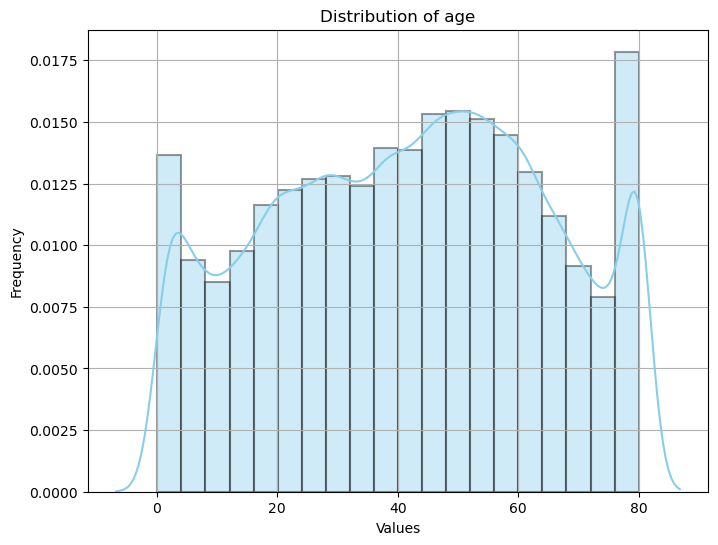

age is left-skewed with skewness -0.06772405150765805



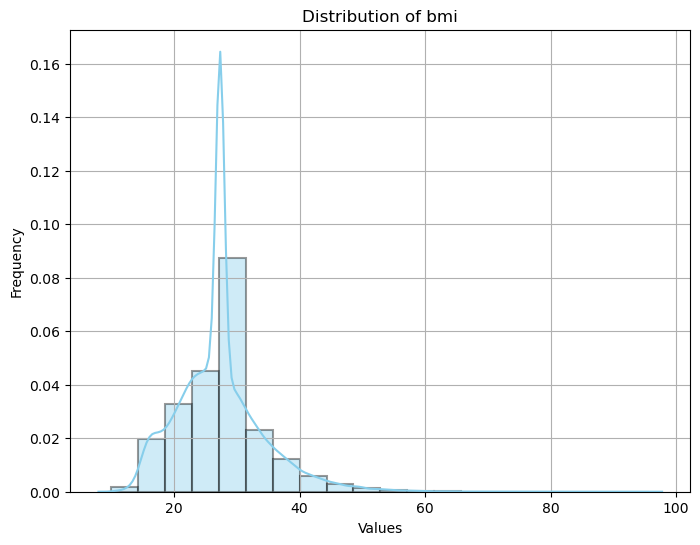

bmi is right-skewed with skewness 1.0132032656202121



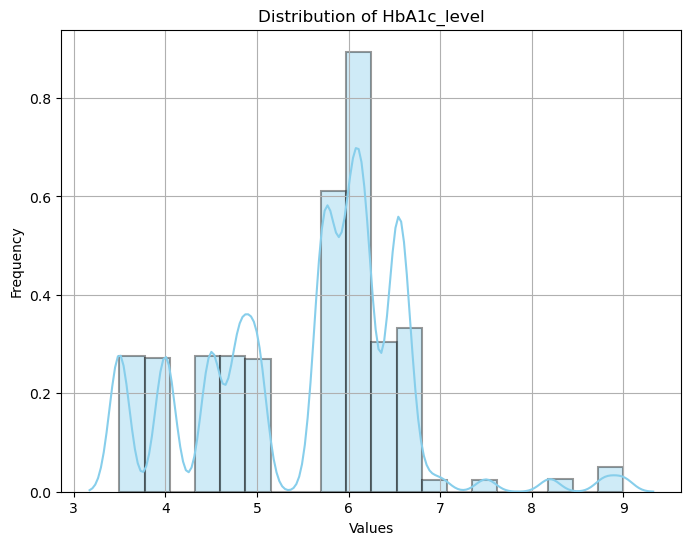

HbA1c_level is left-skewed with skewness -0.048245449330787



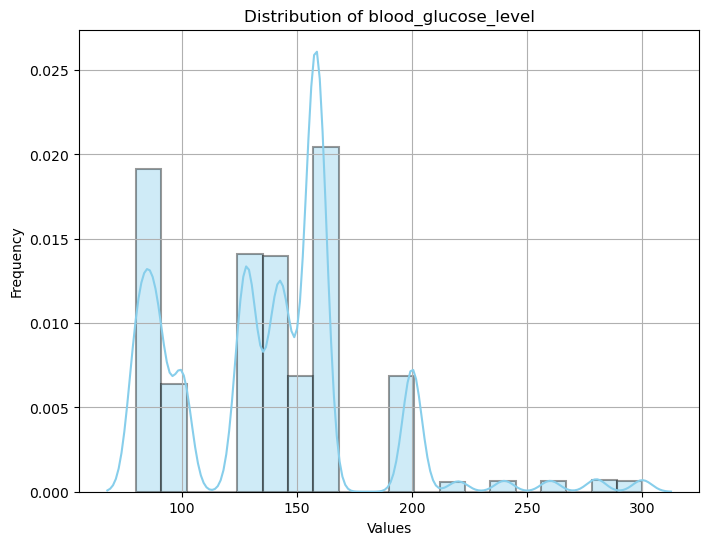

blood_glucose_level is right-skewed with skewness 0.8452467263769488



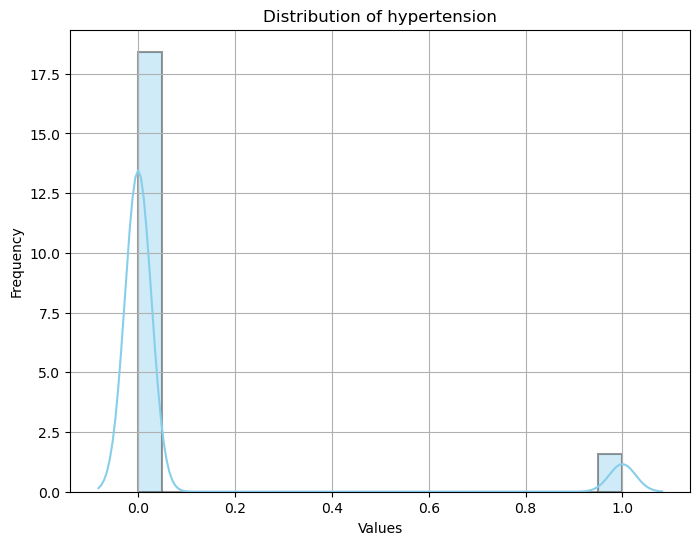

hypertension is right-skewed with skewness 3.120516114130318



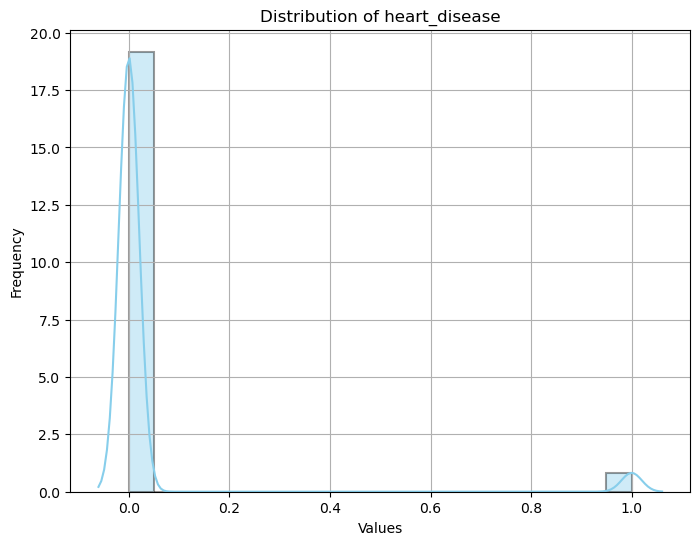

heart_disease is right-skewed with skewness 4.593750990628108



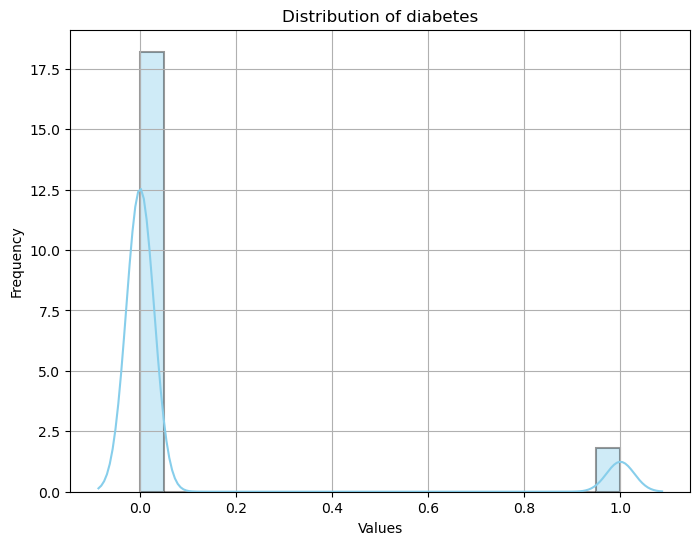

diabetes is right-skewed with skewness 2.8675907900235984

Distribution of 'gender':
Female    0.583062
Male      0.416938
Name: gender, dtype: float64
This is a binary distribution.

Distribution of 'smoking_history':
never          0.693644
former         0.098688
current        0.097648
not current    0.067583
ever           0.042436
Name: smoking_history, dtype: float64
This is a multinomial distribution.



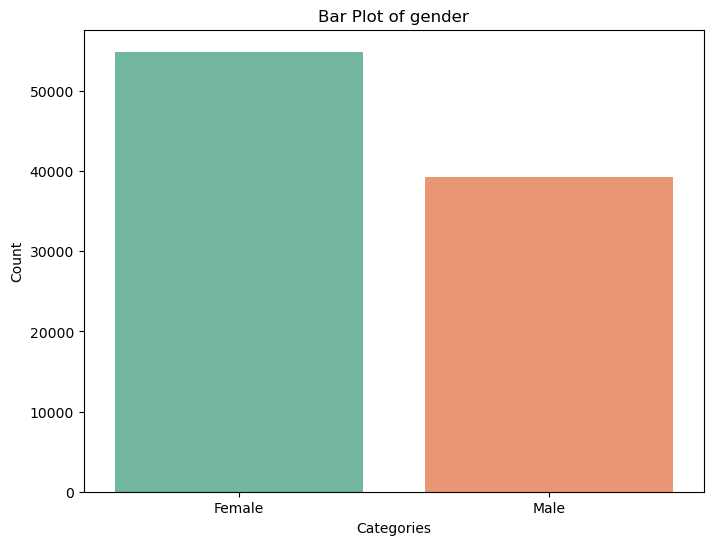

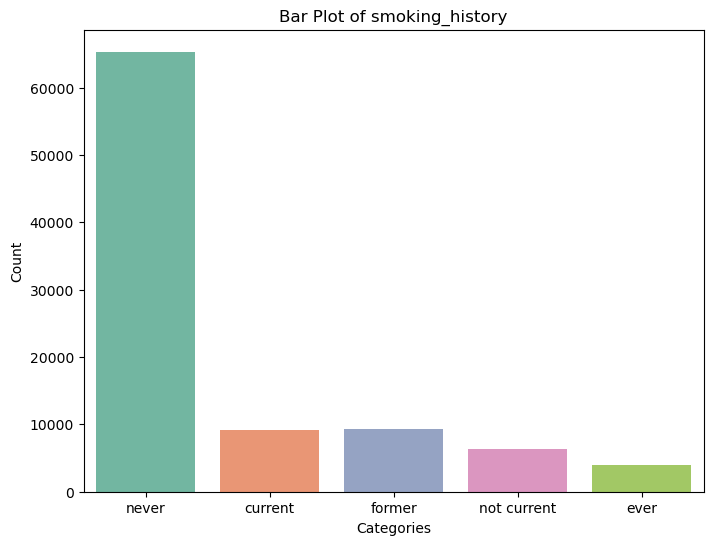

In [49]:
#2A  type of distribution of the data

# Plot distplots for numerical variables
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level','hypertension', 'heart_disease','diabetes']
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.distplot(df[column], bins=20, color='skyblue', kde=True, hist_kws={'edgecolor':'black', 'linewidth': 1.5})
    plt.title(f'Distribution of {column}')
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
    # Check skewness
    skewness = df[column].skew()
    if skewness > 0:
        print(f"{column} is right-skewed with skewness {skewness}")
    elif skewness < 0:
        print(f"{column} is left-skewed with skewness {skewness}")
    else:
        print(f"{column} is approximately symmetric")

    print("")

# Plot bar plots for categorical variables
# Selecting categorical columns
categorical_columns = ['gender', 'smoking_history']

# Calculate frequency of each category
distribution = {}
for column in categorical_columns:
    distribution[column] = df[column].value_counts(normalize=True)

# Analyze the distribution
for column, freq in distribution.items():
    print(f"Distribution of '{column}':")
    print(freq)
    if len(freq) == 2:
        print("This is a binary distribution.")
    elif len(freq) > 2:
        print("This is a multinomial distribution.")
    else:
        print("This distribution seems uniform.")
    print()

# Plot bar plots for categorical variables
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=df, palette='Set2')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    plt.show()

##  Types Of Distribution Of Data

*Skewness Analysis:*

- *Age:* The skewness of -0.052 indicates a slight left-skewness, suggesting a slightly heavier tail on the left side of the distribution. This means that the distribution is slightly more concentrated on the higher ages, with a longer tail towards younger ages.
  
- *BMI:* With a skewness of 1.044, BMI distribution is right-skewed, indicating that the majority of individuals have lower BMI values, while a few individuals have very high BMI values. This could imply a higher proportion of individuals with higher body mass indices, potentially indicating overweight or obesity.

- *HbA1c Level:* The left-skewed distribution (skewness: -0.067) suggests that most individuals have HbA1c levels towards the lower end of the scale, with a tail extending towards higher values. This might indicate better glycemic control among the majority of individuals, with a smaller proportion exhibiting higher HbA1c levels.

- *Blood Glucose Level:* The skewness of 0.822 indicates a right-skewed distribution, implying that the majority of individuals have lower blood glucose levels, while a smaller proportion have higher levels. This could suggest a healthier population overall with regard to blood glucose levels.


*Categorical Distributions:*

- *Gender:* The binary distribution with 'Female' and 'Male' categories suggests a relatively balanced representation of genders within the dataset, with females slightly outnumbering males.

- *Smoking History:* The multinomial distribution indicates varying frequencies across different smoking history categories. The majority of individuals have never smoked ('never' category), followed by 'former' and 'current' smokers, with 'not current' and 'ever' smokers representing smaller proportions. This provides insights into the distribution of smoking habits within the population.
- *Hypertension:* The binary distribution of 'hypertension' (with categories 'Yes' and 'No') shows that the majority of individuals (presumably) do not have hypertension. It represents the presence or absence of hypertension among individuals, providing clear binary information .

*Conclusion:*

- The skewness of the numerical features and the distribution of categorical variables idnicate that the data is imbalanced so we should use resampling.

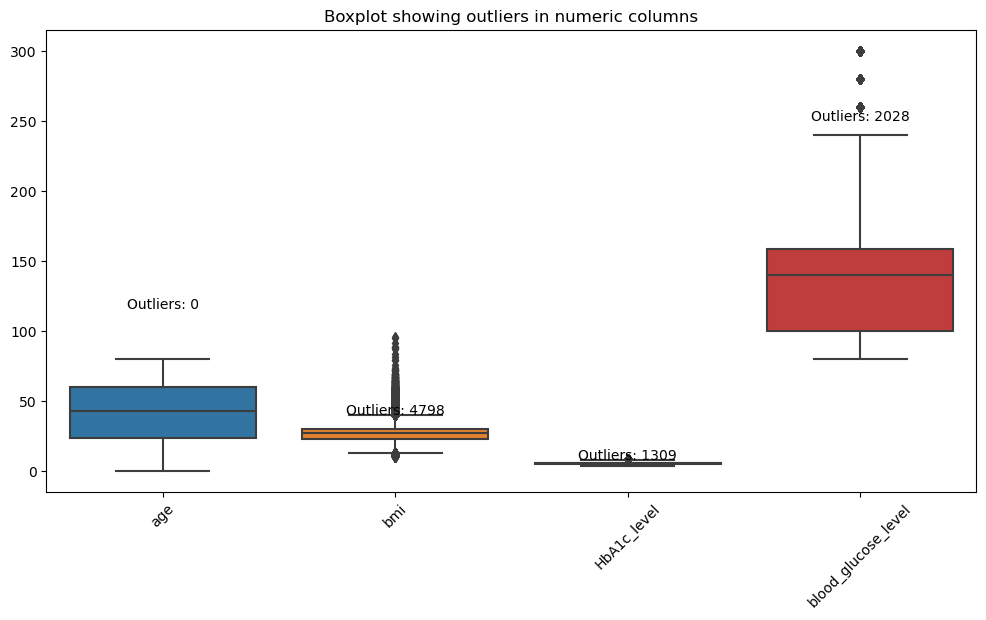

In [50]:
#2)b)Boxplot to detect outliers
cols= ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[cols])
for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    num_outliers = len(outliers)
    plt.text(cols.index(col), upper_bound + 0.05 * iqr, f'Outliers: {num_outliers}', horizontalalignment='center', fontsize=10)
plt.title("Boxplot showing outliers in numeric columns")
plt.xticks(rotation=45)
plt.show()

Robustness to Outliers: Min-Max Scaling is sensitive to outliers because it scales the data based on the minimum and maximum values observed. If the dataset contains outliers, Min-Max Scaling might not perform well. StandardScaler, on the other hand, uses the mean and standard deviation, which are less affected by outliers. 


In [51]:
# 2 C

numeric_columns = df.select_dtypes(include=['float64'])
# Calculate the variance for each numeric column
variances = numeric_columns.var()
# Select the top three columns with the highest variance
top_numeric_columns = variances.sort_values(ascending=False).head(3)

print("Top three columns with the highest variance:")
print(top_numeric_columns)

Top three columns with the highest variance:
blood_glucose_level    1681.826069
age                     506.342472
bmi                      46.760303
dtype: float64


## Variance Insights

1-**blood_glucose_level**: The variance of 1656.73 for the 'blood_glucose_level' column indicates that the values in this column are spread out over a wide range from the mean.

2-**age**: The variance of 506.89 for the 'age' column indicates that the ages of individuals in the dataset vary considerably from the mean age. There is significant diversity in ages.

3-**bmi**: The variance of 44.05 for the 'bmi' (body mass index) column indicates that there is moderate variability in BMI values across the dataset. While not as high as the variance for blood glucose level or age, the variance suggests that there are notable differences in BMI among individuals in the dataset.

In [52]:
# 2 C

# Select categorical columns including binary ones
categorical_columns = ['gender', 'smoking_history', 'heart_disease', 'diabetes', 'hypertension']

# Calculate the number of unique categories for each categorical column
num_categories = df[categorical_columns].apply(lambda x: x.nunique())

# Select the top three columns with the highest number of unique categories
top_categorical_columns = num_categories.sort_values(ascending=False).head(3)

print("Top three columns with high variety in the number of categories:")
print(top_categorical_columns)

Top three columns with high variety in the number of categories:
smoking_history    5
gender             2
heart_disease      2
dtype: int64


                          age  hypertension  heart_disease       bmi  \
age                  1.000000      0.259131       0.240171  0.347650   
hypertension         0.259131      1.000000       0.119235  0.148387   
heart_disease        0.240171      0.119235       1.000000  0.061455   
bmi                  0.347650      0.148387       0.061455  1.000000   
HbA1c_level          0.108919      0.081807       0.068580  0.085193   
blood_glucose_level  0.115909      0.085005       0.071183  0.093293   
diabetes             0.266996      0.194842       0.170232  0.215329   

                     HbA1c_level  blood_glucose_level  diabetes  
age                     0.108919             0.115909  0.266996  
hypertension            0.081807             0.085005  0.194842  
heart_disease           0.068580             0.071183  0.170232  
bmi                     0.085193             0.093293  0.215329  
HbA1c_level             1.000000             0.173933  0.409256  
blood_glucose_level     0.1

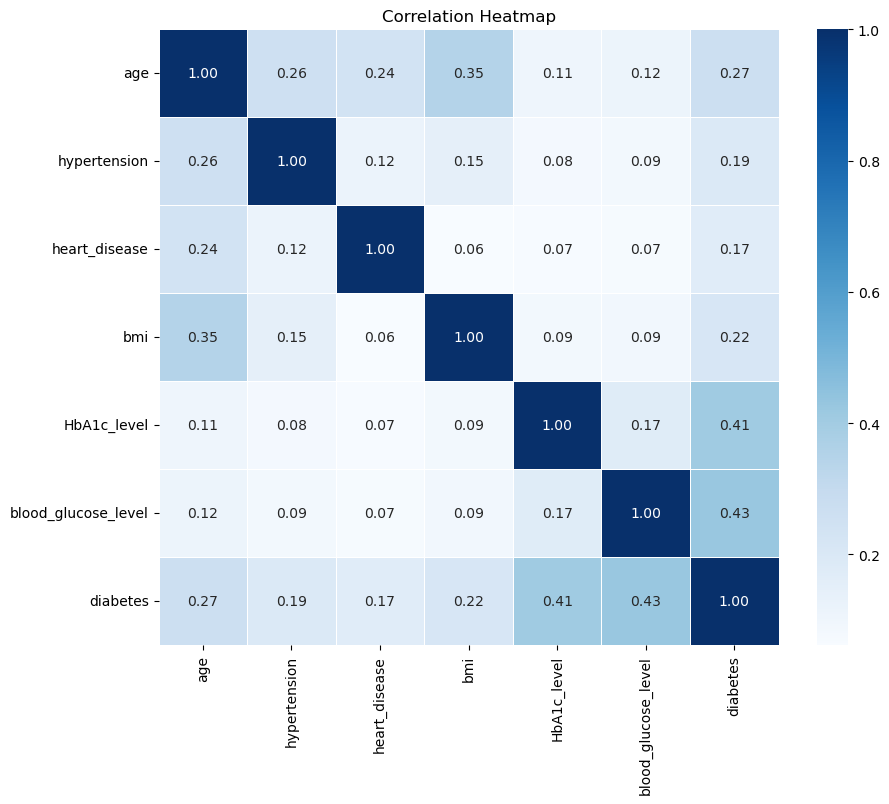

In [53]:
#2)d)Heatmap to show correlation
correlation = df.corr()
print(correlation)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Correlation Insights

1-**Age** and **BMI**: There is a moderate positive correlation (0.34) between **age** and **BMI**. This suggests that as age increases, BMI tends to increase as well, indicating a possible age-related trend in body mass.

2-**Age** and **Diabetes**: **Age** has a moderate positive correlation (0.26) with **diabetes**. This suggests that older individuals may have a higher likelihood of having diabetes.

3-**Hypertension** and **Heart Disease**: There is a weak positive correlation (0.12) between **hypertension** and **heart disease**. This suggests a mild association between these two conditions.

4-**Blood Glucose Level** and **HbA1c Leve**l: **Blood glucose level** and **HbA1c level** exhibit a moderate positive correlation (0.17). This is expected as **HbA1c level** is a measure of average **blood glucose** over a few months, so they are naturally correlated.

5-**Diabetes** and **Blood Glucose Level**/**HbA1c Level**: **Diabetes** has a strong positive correlation with both **blood glucose level** (0.42) and **HbA1c level** (0.40). This is expected since **blood glucose level** and **HbA1c level** are indicators used for diagnosing and monitoring **diabetes**.

## 3. Define the most important insights of takeaways from the data?

The presence of different distributions indicates that the features in the dataset have varying characteristics and behaviors. Some features are numerical and have different distributions while others are binary and categorical.

We can see from the box plot that
- There are many outliers in bmi.
- HbA1c_level doesn't have a wide range of values.
- blood_glucose_level have some outliers and has the highest range of values (highest max and min) and it has the highest variance.

Also age and bmi have high variance.

The heat map doesn't show any strong positive correlation between 2 features.
A correlation coefficient of 0.42 between blood glucose level and diabetes suggests a moderate level of association between the variables. While not as strong as a correlation coefficient of 1, which would indicate a perfect positive correlation, a value of 0.42 still indicates a meaningful relationship between the variables.

In [54]:
cleanedDf=df.copy()

In [55]:
app = dash.Dash(__name__)

dashDf = cleanedDf   # use the df containing cleaned data to prevent interacting with other changes with the df

def update_pie_chart(selected_variable):
    # Filter DataFrame based on selected variable
    if selected_variable == 'diabetes':
        filtered_df = dashDf[dashDf['diabetes'] == 1]
        title = "Distribution of Diabetes Cases by Gender"
    elif selected_variable == 'heart_disease':
        filtered_df = dashDf[dashDf['heart_disease'] == 1]
        title = "Distribution of Heart Disease Cases by Gender"

    # Count the number of cases for each gender category
    counts = filtered_df['gender'].value_counts()

    # Create pie chart
    fig = go.Figure(data=[
        go.Pie(labels=counts.index, values=counts.values)
    ])

    # Update layout
    fig.update_layout(title=title)

    return fig

# Function to create heatmap
def update_heatmap(selected_condition):
    if selected_condition == 'hypertension':
        # Create a cross-tabulation of diabetes and hypertension
        crosstab = pd.crosstab(index=dashDf['diabetes'], columns=dashDf['hypertension'])
        title = "Relationship between Diabetes and Hypertension"
        x_axis_title = "Hypertension"
    elif selected_condition == 'heart_disease':
        # Create a cross-tabulation of diabetes and heart disease
        crosstab = pd.crosstab(index=dashDf['diabetes'], columns=dashDf['heart_disease'])
        title = "Relationship between Diabetes and Heart Disease"
        x_axis_title = "Heart Disease"

    # Create heatmap
    fig = ff.create_annotated_heatmap(z=crosstab.values,
                                      x=list(crosstab.columns),
                                      y=list(crosstab.index),
                                      colorscale='Viridis')

    # Update layout
    fig.update_layout(title=title,
                      xaxis_title=x_axis_title,
                      yaxis_title="Diabetes")

    return fig

# Function to categorize blood glucose levels
def categorize_blood_glucose(glucose_level):
    if glucose_level <= 100:
        return 'Normal (<=100)'
    elif glucose_level <= 200:
        return 'High (<= 200)'
    else:
        return 'Very High (>200)'

# Apply categorization to the blood glucose column
dashDf['glucose_category'] = dashDf['blood_glucose_level'].apply(categorize_blood_glucose)

def create_stacked_bar_chart():
    # Group data by glucose category and diabetes status
    grouped_data = dashDf.groupby(['glucose_category', 'diabetes']).size().unstack(fill_value=0)

    # Create traces for each diabetes status
    traces = []
    for status in [0, 1]:
        trace = go.Bar(
            x=grouped_data.index,
            y=grouped_data[status],
            name=f'Diabetes {status}',
        )
        traces.append(trace)

    layout = go.Layout(
        title='Distribution of Diabetes Cases by Blood Glucose Category',
        barmode='stack',
        xaxis=dict(title='Blood Glucose Category'),
        yaxis=dict(title='Number of Cases'),
    )

    fig = go.Figure(data=traces, layout=layout)
    return fig

# Dash layout
app.layout = html.Div([
    html.H1("Relationship Between Gender and Health Conditions"),

    dcc.Dropdown(
        id='variable-dropdown',
        options=[
            {'label': 'Diabetes', 'value': 'diabetes'},
            {'label': 'Heart Disease', 'value': 'heart_disease'}
        ],
        value='diabetes',
        clearable=False
    ),

    dcc.Graph(id='gender-health-condition-pie-chart'),
    html.Hr(),  # Horizontal line
    html.Div([
        html.Label("Select Condition for Heatmap:"),
        dcc.Dropdown(
            id='condition-dropdown',
            options=[
                {'label': 'Hypertension', 'value': 'hypertension'},
                {'label': 'Heart Disease', 'value': 'heart_disease'}
            ],
            value='hypertension',
            clearable=False
        )
    ]),

    dcc.Graph(id='health-condition-heatmap'),

    html.Hr(),  # Horizontal line

    html.H1("Relationship Between Blood Glucose Levels and Diabetes"),
    dcc.Graph(id='stacked-bar-chart')
])

# Callback to update bar chart based on selected category
@app.callback(
    Output('stacked-bar-chart', 'figure'),
    Input('stacked-bar-chart', 'id')
)
def update_stacked_bar_chart(_):
    return create_stacked_bar_chart()

# Callback to update pie chart based on selected variable
@app.callback(
    Output('gender-health-condition-pie-chart', 'figure'),
    Input('variable-dropdown', 'value')
)
def update_pie_chart_callback(selected_variable):
    return update_pie_chart(selected_variable)

# Callback to update heatmap based on selected condition
@app.callback(
    Output('health-condition-heatmap', 'figure'),
    Input('condition-dropdown', 'value')
)
def update_heatmap_callback(selected_condition):
    return update_heatmap(selected_condition)

# Dash app
if __name__ == '__main__':
    app.run_server(debug=True)

<br>

## 5. List at least 4 preprocessing steps that should be performed.
- Handling Missing Values (Median/Mode Imputation)
- Removing Duplicates
- Scaling numerical features (StandardScaler)
- Encoding categorical features (Label Encoding)
- Resampling (SMOTE)

In [56]:
# one hot encoding
df = pd.get_dummies(df, columns=['gender', 'smoking_history'])

In [57]:
numerical_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

scaler = StandardScaler()

df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [58]:
features = df.drop(columns=['diabetes'])
target = df['diabetes']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [60]:
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [61]:
print((y_train_balanced == 0).sum())
print((y_train_balanced == 1).sum())

60033
60033


In [62]:
models = {
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Neural Network': MLPClassifier()
}

In [63]:
best_accuracy = 0
best_model_name = ""
best_model = None

for name, model in models.items():
    # Train the model
    model.fit(X_train_balanced, y_train_balanced)

    # Train accuracy
    train_pred = model.predict(X_train_balanced)
    train_accuracy = accuracy_score(y_train_balanced, train_pred)

    # Test accuracy
    test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_pred)

    if test_accuracy > best_accuracy:
        best_model = model
        best_accuracy = test_accuracy
        best_model_name = name
        precision = precision_score(y_test, test_pred)
        recall = recall_score(y_test, test_pred)
        f1 = f1_score(y_test, test_pred)
        conf_matrix = confusion_matrix(y_test, test_pred)
        if name == 'Logistic Regression':
            roc_auc = roc_auc_score(y_test, test_pred)

    # Print train and test accuracies and evaluation metrics
    print(f"{name}:")
    print(f"Train Accuracy: {train_accuracy}")
    print(f"Test Accuracy: {test_accuracy}")
    print()

KNN:
Train Accuracy: 0.9656189095997202
Test Accuracy: 0.907787610619469

Logistic Regression:
Train Accuracy: 0.8837222860759916
Test Accuracy: 0.8840353982300885

Random Forest:
Train Accuracy: 0.9993920010660803
Test Accuracy: 0.9556106194690266

Neural Network:
Train Accuracy: 0.9251744873652824
Test Accuracy: 0.908424778761062



In [64]:
print(f"Best model: {best_model_name} (Accuracy: {best_accuracy})")
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(conf_matrix)
if best_model_name == 'Logistic Regression':
    print("ROC AUC Score:", roc_auc)

Best model: Random Forest (Accuracy: 0.9556106194690266)
Precision: 0.7661193432118543
Recall: 0.740611691831204
F1-score: 0.7531496062992127
Confusion Matrix:
[[25083   584]
 [  670  1913]]


In [65]:
joblib.dump(best_model, 'best_model.pkl')

['best_model.pkl']

In [66]:
def predict_new_data(new_data, model_path='best_model.pkl'):

    loaded_model = joblib.load(model_path)

    predictions = loaded_model.predict(new_data)

    return predictions

In [67]:
# Sample use:
# new_predictions = predict_new_data(new_data)